<a href="https://colab.research.google.com/github/Priyankshu-ui-96/Machine-Learning-Dataset-practice/blob/main/optimal_threshold_using_roc_auc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
from sklearn.datasets import make_classification

In [4]:
X, y = make_classification(n_samples=2000 , n_classes=2 , weights=[1,1] , random_state=1)

In [5]:
X.shape

(2000, 20)

In [6]:
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=1 )

In [7]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

***apllication of different models:***

***1. Random Forest***

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train , y_train)
y_train_pred = rf_clf.predict_proba(X_train)
print("RF-MODEL TRAIN ROC-AUC :{}".format(roc_auc_score(y_train , y_train_pred[: , 1])))
y_test_pred = rf_clf.predict_proba(X_test)
print("rf-model test roc-auc:{}".format(roc_auc_score(y_test , y_test_pred[:,1])))

RF-MODEL TRAIN ROC-AUC :1.0
rf-model test roc-auc:0.9834166666666666


***2.Logistic Regression:***

In [9]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
y_train_pred = lr_clf.predict_proba(X_train)
print("lr_clf train roc-auc:{}".format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred = lr_clf.predict_proba(X_test)
print("lr_clf test roc-auc:{}".format(roc_auc_score(y_test , y_test_pred[:,1])))

lr_clf train roc-auc:0.9863568922694498
lr_clf test roc-auc:0.9885777777777777


***3.AdaBoost Classifier:***

In [10]:
from sklearn.ensemble import AdaBoostClassifier 
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train , y_train)
y_train_pred = ada_clf.predict_proba(X_train)
print("ada_clf train roc-auc:{}".format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred = ada_clf.predict_proba(X_test)
print("ada_clf test roc-auc:{}".format(roc_auc_score(y_test , y_test_pred[:,1])))


ada_clf train roc-auc:0.9975081174960356
ada_clf test roc-auc:0.9826111111111111


***4.KNN CLASSIFIER / KNeighborsClassifier:***

In [11]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train , y_train)
y_train_pred= kn_clf.predict_proba(X_train)
print("kn_clf train roc-auc:{}".format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred = kn_clf.predict_proba(X_test)
print("kn_clf test roc-auc:{}".format(roc_auc_score(y_test , y_test_pred[:,1])))


kn_clf train roc-auc:0.981670071491109
kn_clf test roc-auc:0.9426111111111111


***Now we will focus on selecting the best threshold for maximum accuracy***

In [12]:
pred = []
for  model in [rf_clf , lr_clf , ada_clf , kn_clf]:
  pred.append(pd.Series(model.predict_proba(X_test)[:, 1]))
final_prediction = pd.concat(pred , axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))



Ensemble test roc-auc: 0.9851777777777777


In [13]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.98,0.966929,0.538202,0.8
3,0.93,0.761539,0.509875,0.8
4,0.64,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.02,0.000003,0.441377,0.0
597,0.99,0.984385,0.532403,1.0
598,0.00,0.001147,0.441720,0.2


In [14]:
pd.concat(pred , axis=1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.98,0.966929,0.538202,0.8
3,0.93,0.761539,0.509875,0.8
4,0.64,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.02,0.000003,0.441377,0.0
597,0.99,0.984385,0.532403,1.0
598,0.00,0.001147,0.441720,0.2


In [15]:
final_prediction

0      0.885262
1      0.115823
2      0.821283
3      0.750353
4      0.577447
         ...   
595    0.121340
596    0.115345
597    0.876697
598    0.160717
599    0.834857
Length: 600, dtype: float64

***Calculate the ROc Curve***

In [16]:
fpr , tpr , thresholds = roc_curve(y_test , final_prediction)
thresholds

array([1.9109413 , 0.9109413 , 0.90373256, 0.90327475, 0.80287052,
       0.80162833, 0.79627646, 0.7930558 , 0.78347738, 0.78321156,
       0.77175879, 0.76787124, 0.75141018, 0.75137362, 0.70845844,
       0.70393711, 0.6792442 , 0.67743537, 0.61744697, 0.61550386,
       0.59712652, 0.59675354, 0.59146627, 0.59114346, 0.57149047,
       0.56986186, 0.56838469, 0.56389283, 0.54865858, 0.54719563,
       0.54605932, 0.49616892, 0.46950602, 0.46794916, 0.4446034 ,
       0.41764281, 0.40879719, 0.35934818, 0.35336612, 0.2244954 ,
       0.22390421, 0.21540022, 0.21396893, 0.20483682, 0.20348417,
       0.12833353, 0.1278351 , 0.10498954])

In [17]:
from sklearn.metrics import accuracy_score 
accuracy_ls = []
for thres in thresholds :
  y_pred = np.where( final_prediction > thres , 1 ,0)
  accuracy_ls.append(accuracy_score(y_test , y_pred , normalize=True))

accuracy_ls = pd.concat([pd.Series(thresholds) , pd.Series(accuracy_ls)] , axis=1)
accuracy_ls.columns = ['Thresholds ' , 'accuracy']
accuracy_ls.sort_values(by='accuracy' , ascending=False , inplace = True )
accuracy_ls.head()

,Thresholds,accuracy
34,0.444603,0.960000
29,0.547196,0.960000
27,0.563893,0.960000
25,0.569862,0.960000
24,0.571490,0.958333


In [21]:
def plot_roc_curve(fpr , tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

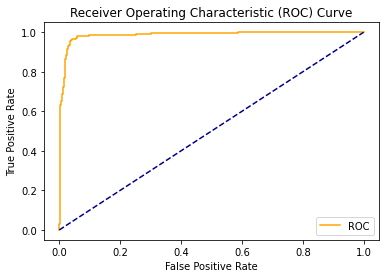

In [22]:
plot_roc_curve(fpr,tpr)